# MINI PROJECT (NBA GAME STATISTICS)

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn import svm
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
import graphviz
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing and cleaning of Datasets

In [2]:
df_nba = pd.read_csv("./Dataset/games.csv")
df_nba.columns = df_nba.columns.str.replace("_"," ")
df_nba["HOME TEAM WINS"]  = df_nba["HOME TEAM WINS"].map({0: False, 1: True})
print(df_nba.dtypes)

GAME DATE EST        object
GAME ID               int64
GAME STATUS TEXT     object
HOME TEAM ID          int64
VISITOR TEAM ID       int64
SEASON                int64
TEAM ID home          int64
PTS home            float64
FG PCT home         float64
FT PCT home         float64
FG3 PCT home        float64
AST home            float64
REB home            float64
TEAM ID away          int64
PTS away            float64
FG PCT away         float64
FT PCT away         float64
FG3 PCT away        float64
AST away            float64
REB away            float64
HOME TEAM WINS         bool
dtype: object


In [3]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME DATE EST     26651 non-null  object 
 1   GAME ID           26651 non-null  int64  
 2   GAME STATUS TEXT  26651 non-null  object 
 3   HOME TEAM ID      26651 non-null  int64  
 4   VISITOR TEAM ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM ID home      26651 non-null  int64  
 7   PTS home          26552 non-null  float64
 8   FG PCT home       26552 non-null  float64
 9   FT PCT home       26552 non-null  float64
 10  FG3 PCT home      26552 non-null  float64
 11  AST home          26552 non-null  float64
 12  REB home          26552 non-null  float64
 13  TEAM ID away      26651 non-null  int64  
 14  PTS away          26552 non-null  float64
 15  FG PCT away       26552 non-null  float64
 16  FT PCT away       26552 non-null  float6

In [4]:
win = df_nba['HOME TEAM WINS'].to_frame()
print(win["HOME TEAM WINS"].value_counts())

True     15645
False    11006
Name: HOME TEAM WINS, dtype: int64


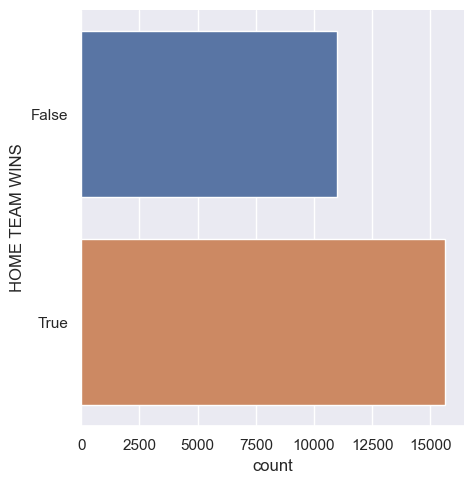

In [5]:

sns.catplot(y = "HOME TEAM WINS", data = win, kind = "count")

As we are looking at the factors that primarily help the home team win, we will start by removing some columns from the data frame. The columns that we'll remove from the data frame are as follows: 
1. GAME DATE EST
2. GAME ID
3. GAME STATUS TEXT
4. HOME TEAM ID
5. VISITOR TEAM ID
6. SEASON
7. TEAM ID home
8. TEAM ID away

In [6]:
cleanDF_nba=df_nba.drop(['GAME DATE EST','GAME ID', 'GAME STATUS TEXT', 'HOME TEAM ID', 'VISITOR TEAM ID', 'SEASON', 'TEAM ID home', 'TEAM ID away', 'FG PCT away'],axis=1)
# cleanDF_nba.dropna()

Now that we have cleaned the data and obtained the data required, we can get started on exploratory data analysis and visualization. We will primarily be focusing on the following data and its effect on the categorical variable HOME TEAM WINS:
1. FG PCT Home
2. FT PCT Home
3. AST Home
4. REB Home

## Exploratory Data Analysis

In [7]:
fg_rate = cleanDF_nba['FG PCT home'].to_frame()
ft_rate = cleanDF_nba['FT PCT home'].to_frame()
ast_count = cleanDF_nba['AST home'].to_frame()
reb_count = cleanDF_nba['REB home'].to_frame()

<Axes: >

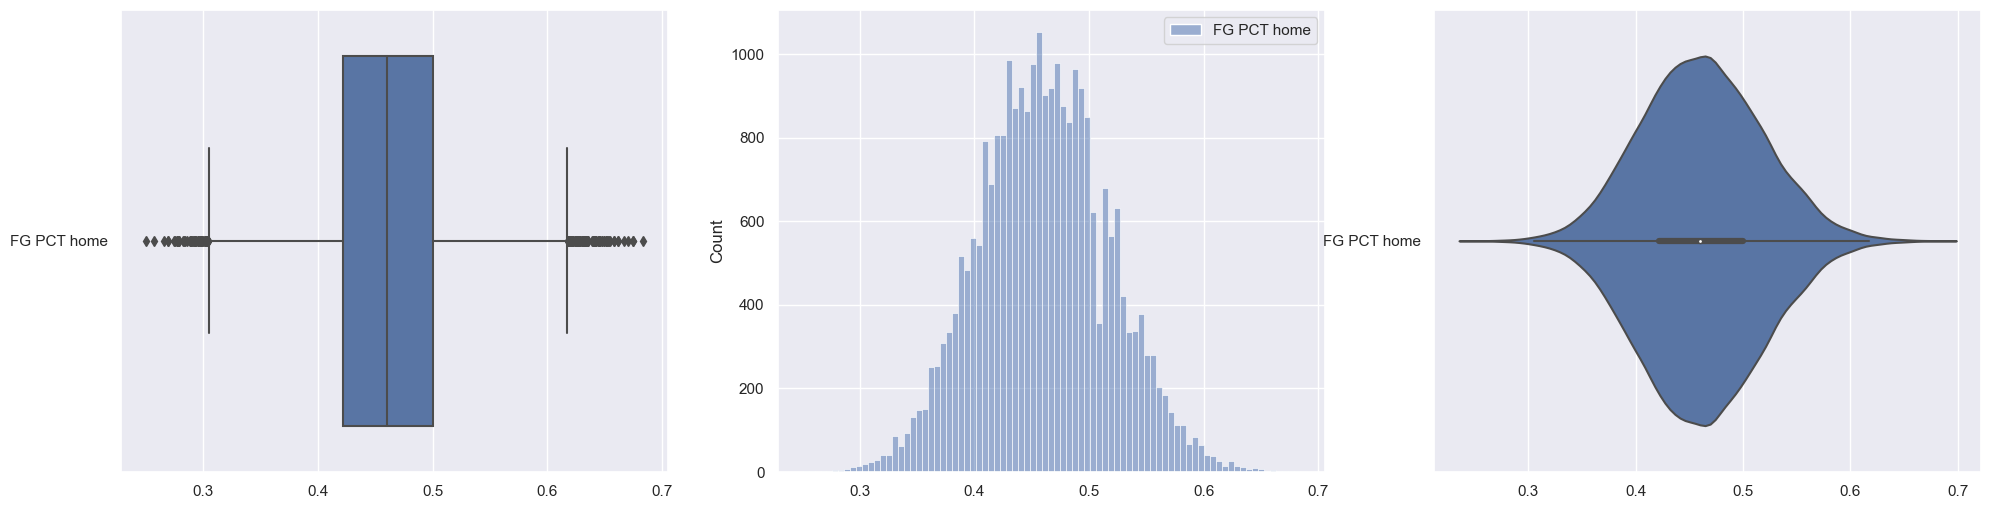

In [8]:
# Plot the distributions of fg_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = fg_rate, orient = "h", ax = axes[0])
sns.histplot(data = fg_rate, ax = axes[1])
sns.violinplot(data = fg_rate, orient = "h", ax = axes[2])


[]

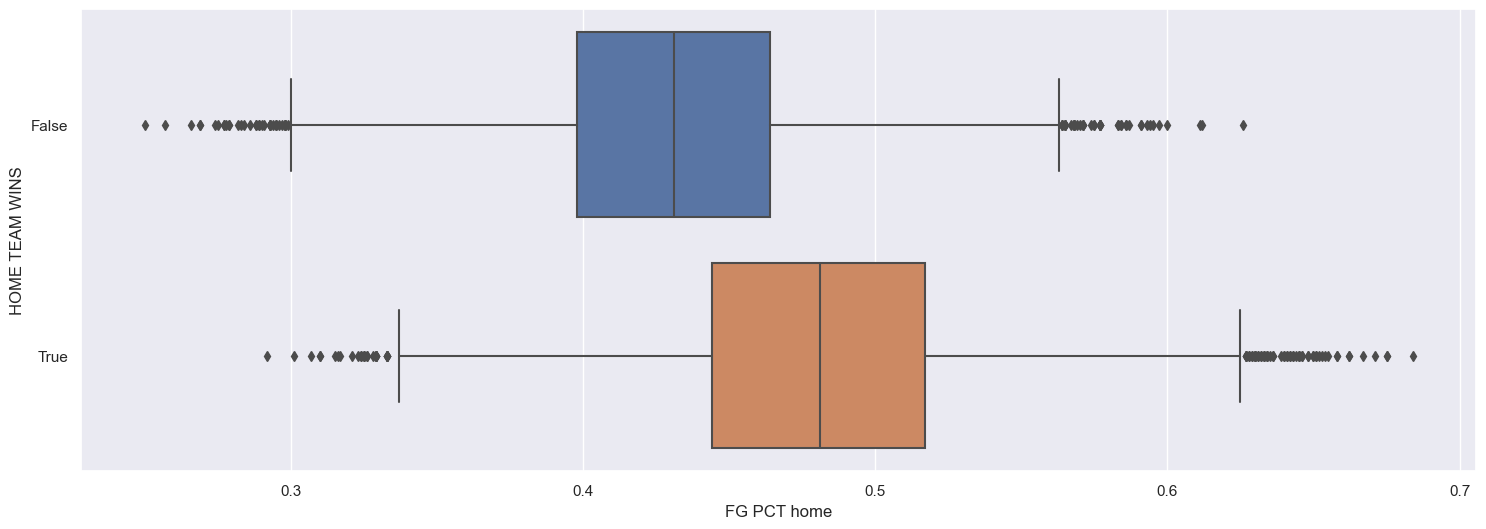

In [9]:
# Create a joint dataframe of field goal rate with win rate
newDF1 = pd.concat([fg_rate, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FG PCT home", y = "HOME TEAM WINS", data = newDF1, orient = "h")
plt.plot()


<Axes: >

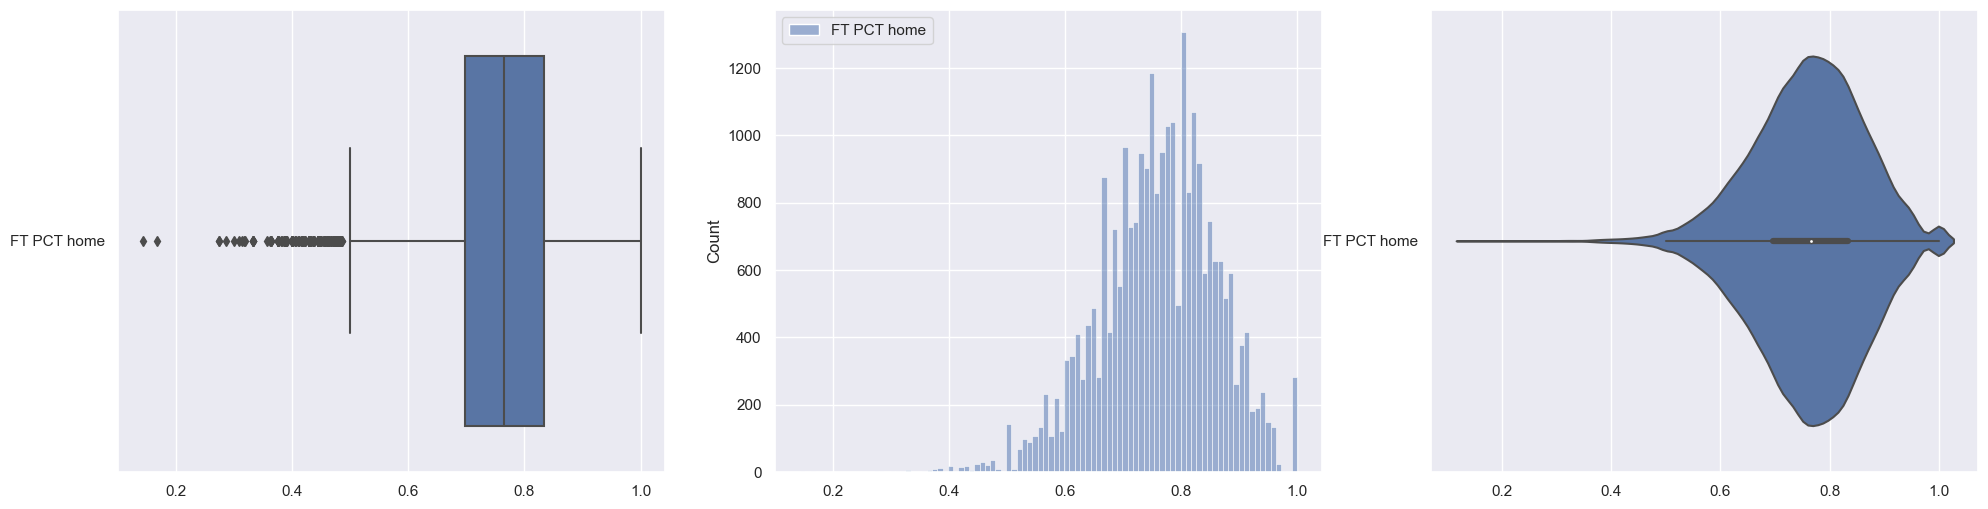

In [10]:
# Plot the distributions of ft_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ft_rate, orient = "h", ax = axes[0])
sns.histplot(data = ft_rate, ax = axes[1])
sns.violinplot(data = ft_rate, orient = "h", ax = axes[2])

[]

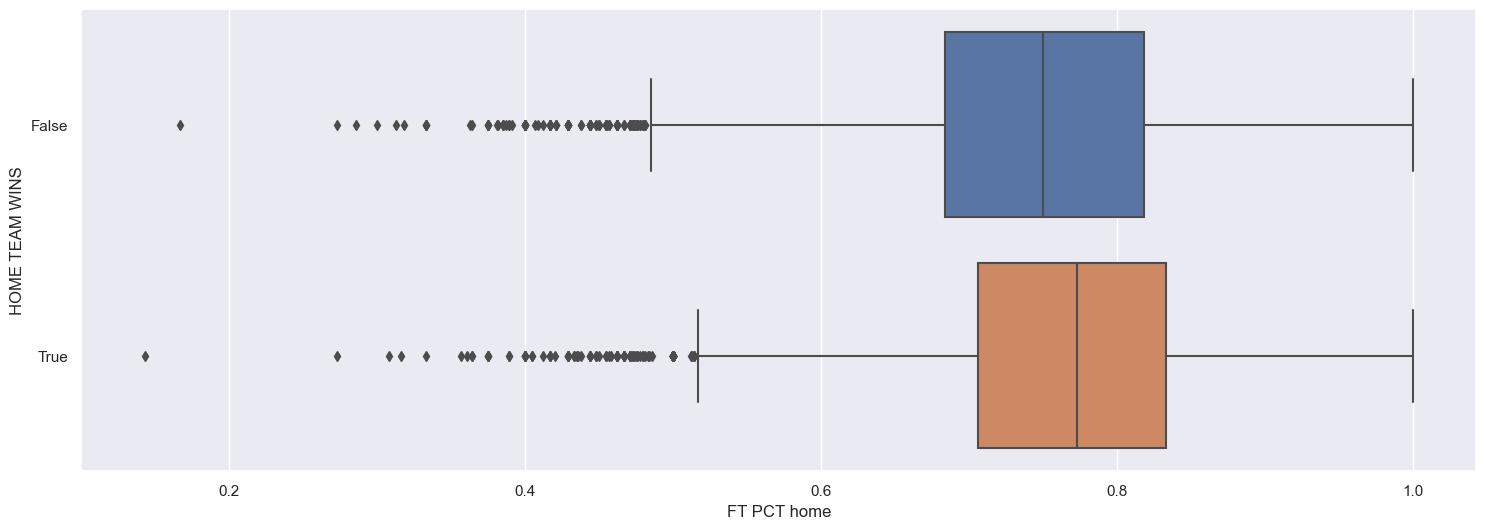

In [11]:
# Create a joint dataframe of free throw rate with win rate
newDF2 = pd.concat([ft_rate, win], axis = 1).reindex(ft_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FT PCT home", y = "HOME TEAM WINS", data = newDF2, orient = "h")
plt.plot()

<Axes: >

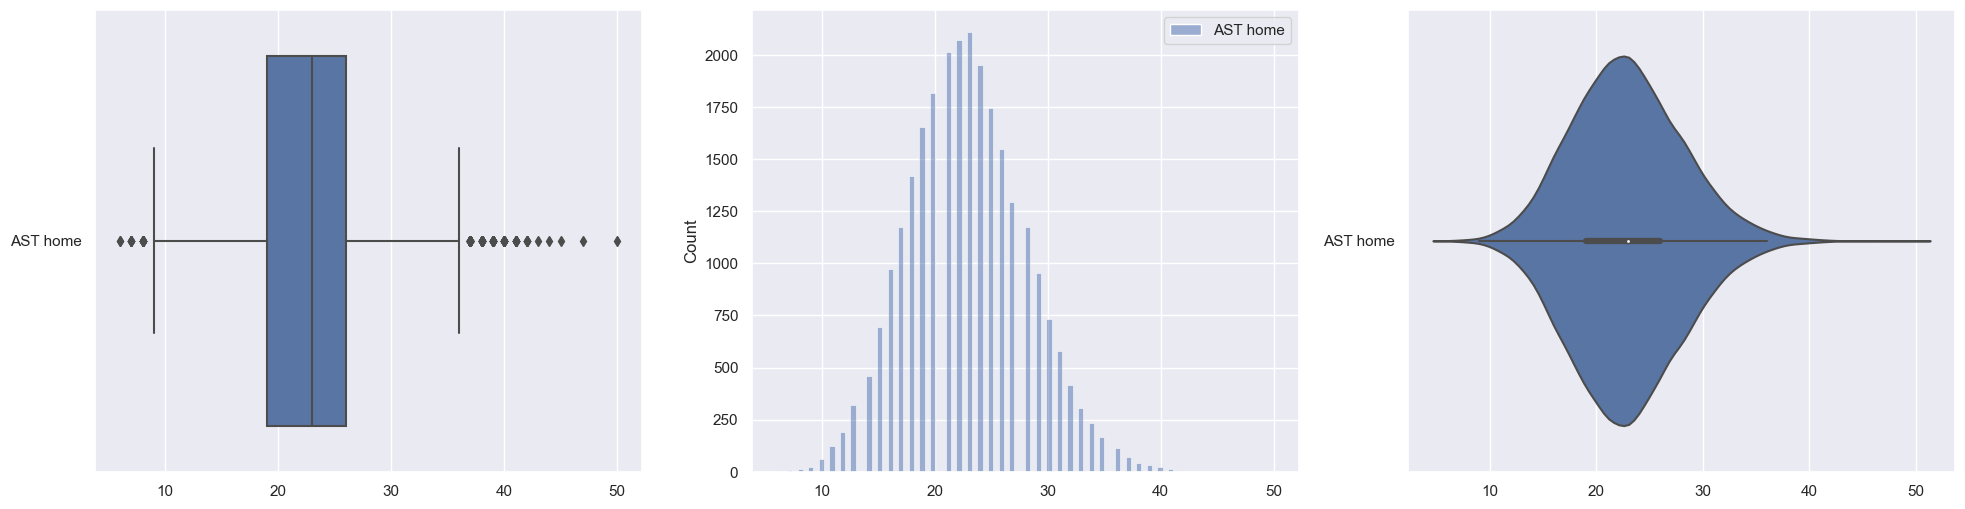

In [12]:
# Plot the distributions of ast_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ast_count, orient = "h", ax = axes[0])
sns.histplot(data = ast_count, ax = axes[1])
sns.violinplot(data = ast_count, orient = "h", ax = axes[2])

[]

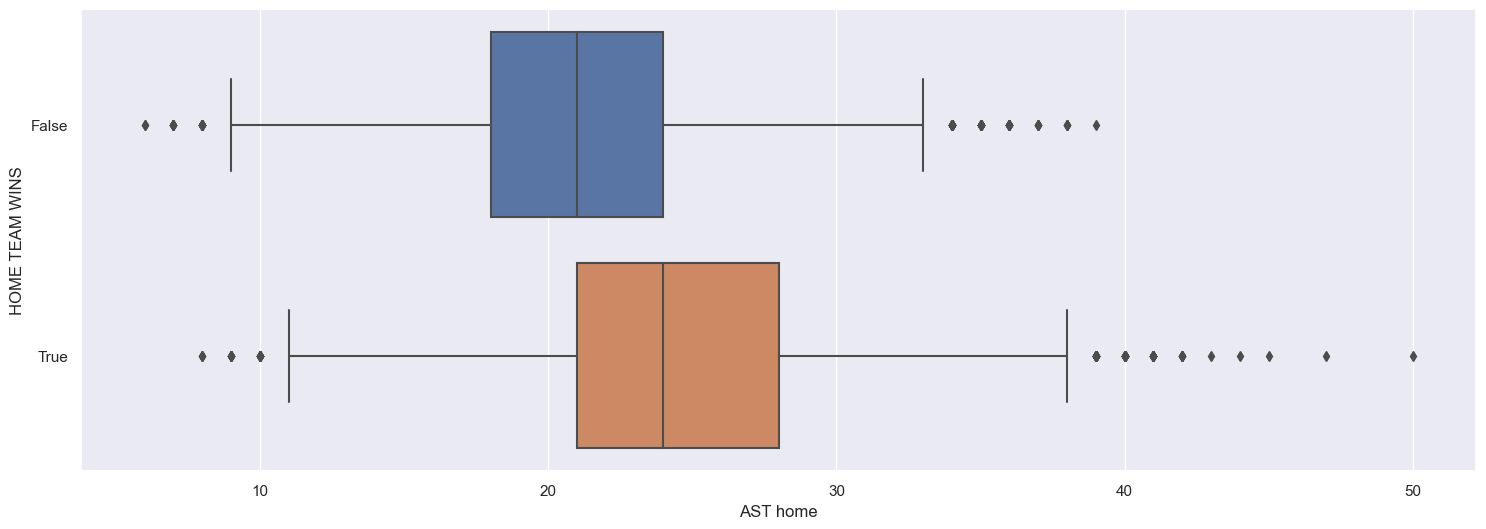

In [13]:
# Create a joint dataframe of number of assist with win rate
newDF3 = pd.concat([ast_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "AST home", y = "HOME TEAM WINS", data = newDF3, orient = "h")
plt.plot()

<Axes: >

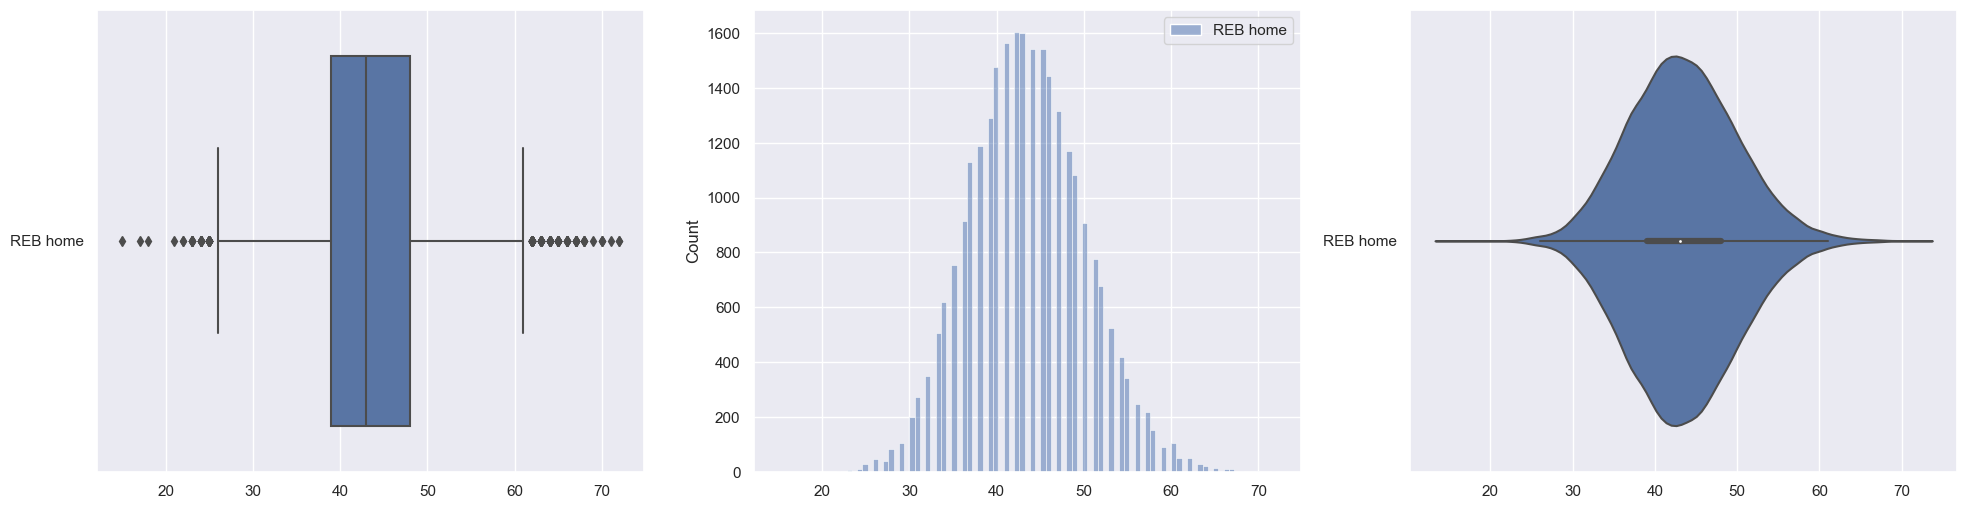

In [14]:
# Plot the distributions of reb_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = reb_count, orient = "h", ax = axes[0])
sns.histplot(data = reb_count, ax = axes[1])
sns.violinplot(data = reb_count, orient = "h", ax = axes[2])

[]

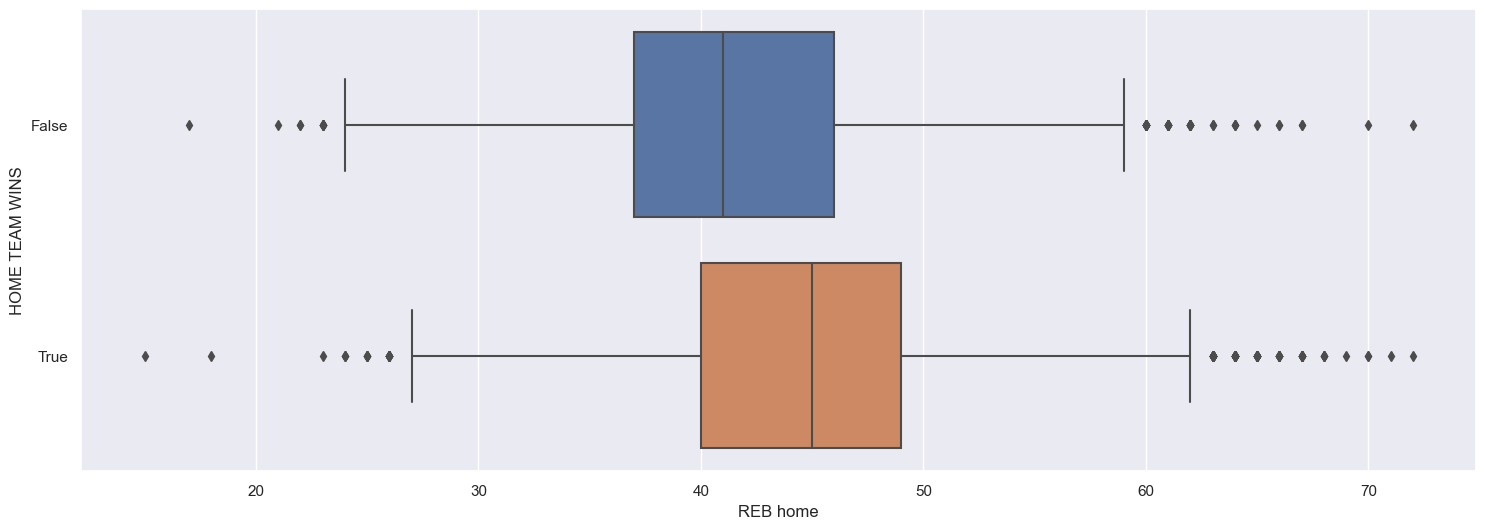

In [15]:
# Create a joint dataframe of number of rebounds with win rate
newDF4 = pd.concat([reb_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize = (18, 6))
sns.boxplot(x = "REB home", y = "HOME TEAM WINS", data = newDF4, orient = "h")
plt.plot()

Inputs/ analysis for which variable seems better

## Classification tree fitting

In [16]:
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.DataFrame
y_test: pd.DataFrame
newDF1  =newDF1.dropna()
X_train, X_test, y_train, y_test = train_test_split(newDF1["FG PCT home"].to_frame(), newDF1["HOME TEAM WINS"].to_frame(), test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

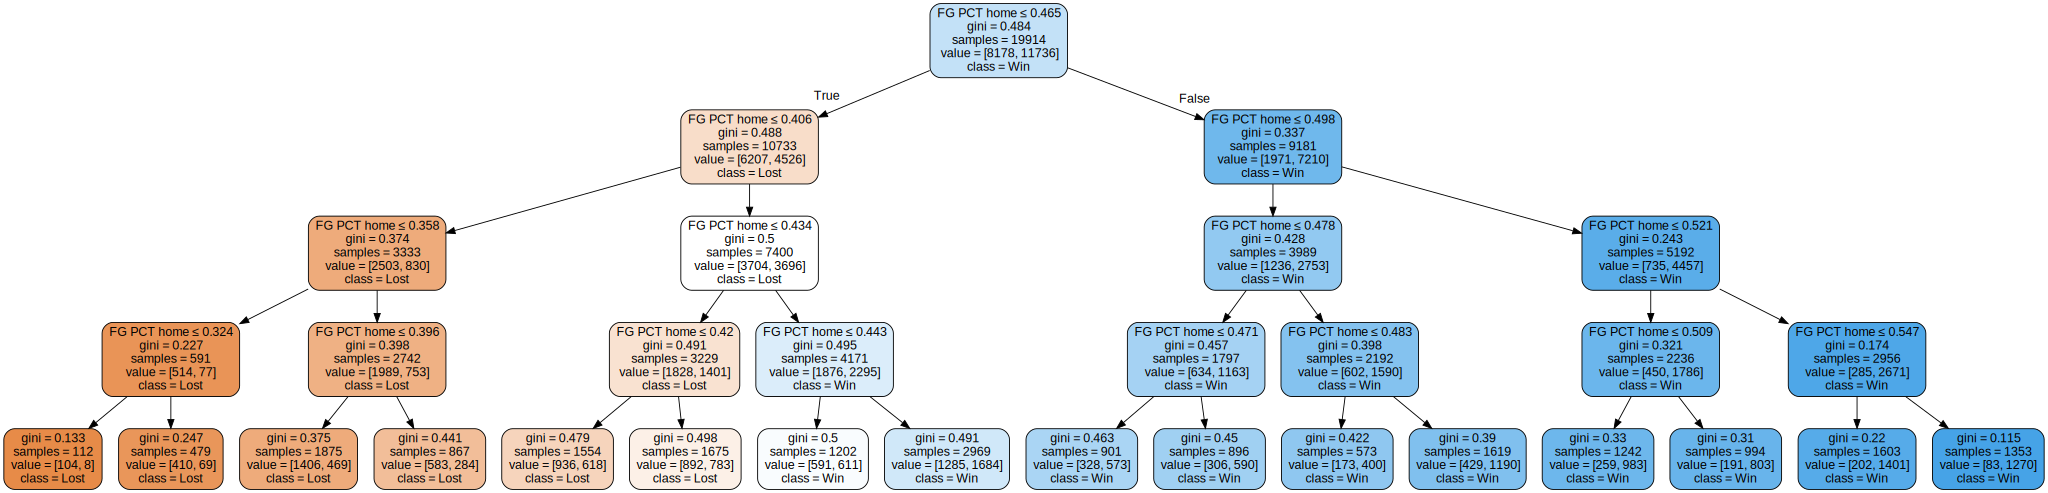

<Figure size 4800x1200 with 0 Axes>

In [17]:
f = plt.figure(figsize = (48, 12))
export_data =  export_graphviz(dectree, out_file=None, feature_names=X_train.columns, 
            rounded = True,
            filled=True,
            special_characters=True,
          class_names=["Lost","Win"])
graphviz.Source(export_data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6947875866224766 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6934317565531787 



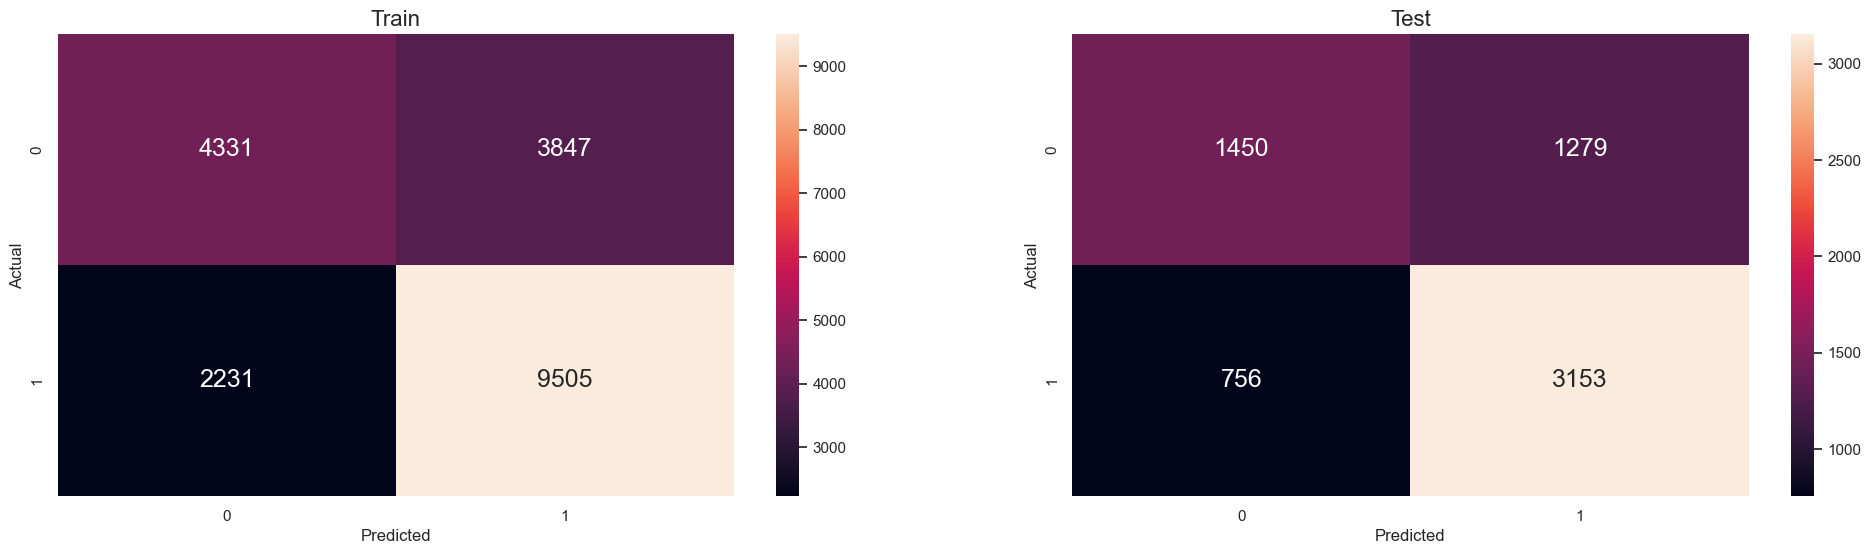

In [18]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.show()

In [19]:
clf = svm.SVC()
clf.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6944360751230291 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6940343476950889 



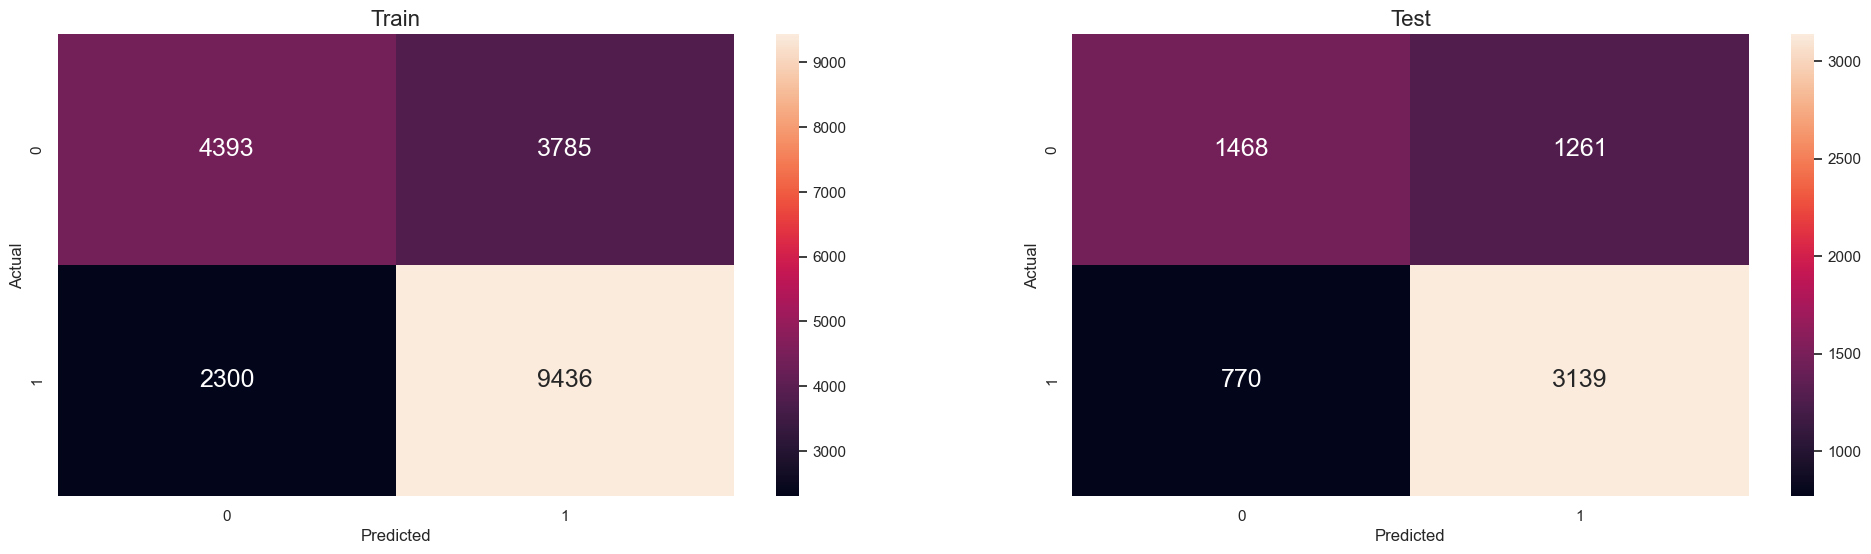

In [20]:
clf_train_pred = clf.predict(X_train)
clf_test_pred = clf.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.show()


In [21]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6937330521241337 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6922265742693582 



Text(0.5, 33.249999999999986, 'Predicted')

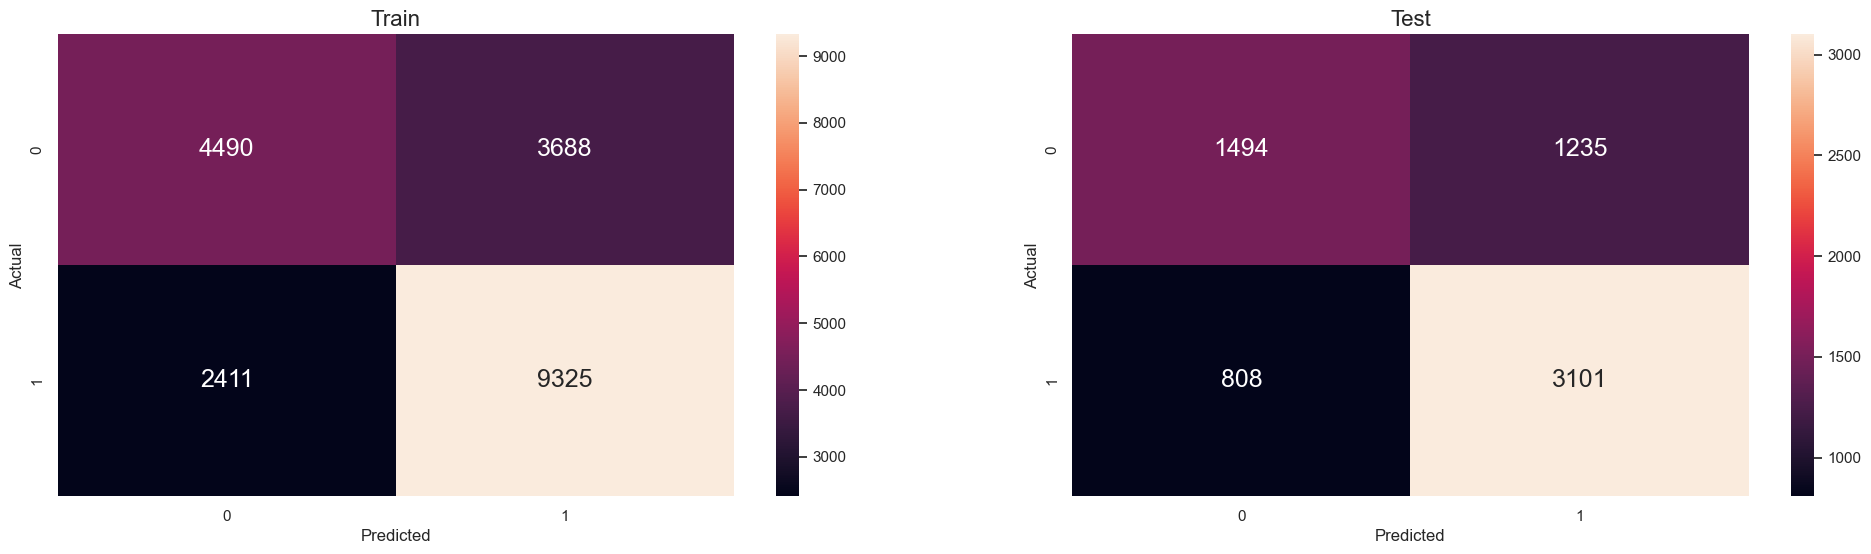

In [22]:
clf_linear_train_pred = clf_linear.predict(X_train)
clf_linear_test_pred = clf_linear.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf_linear.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf_linear.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_linear_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_linear_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

In [23]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6944360751230291 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6940343476950889 



Text(0.5, 33.249999999999986, 'Predicted')

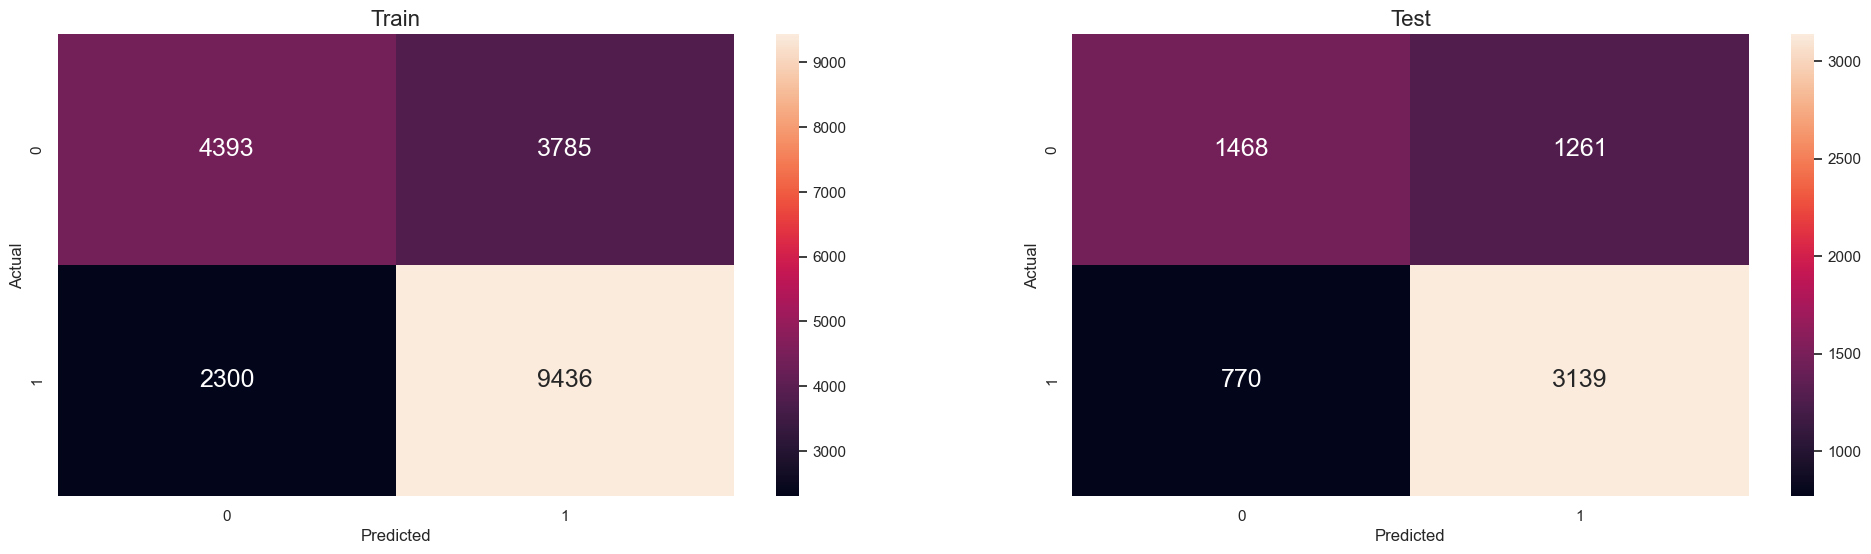

In [24]:
clf_rbf_train_pred = clf_rbf.predict(X_train)
clf_rbf_test_pred = clf_rbf.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf_rbf.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf_rbf.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_rbf_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_rbf_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

In [25]:
clf_sigmoid = svm.SVC(kernel="sigmoid")
clf_sigmoid.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5893341367881892 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5888821934317565 



Text(0.5, 33.249999999999986, 'Predicted')

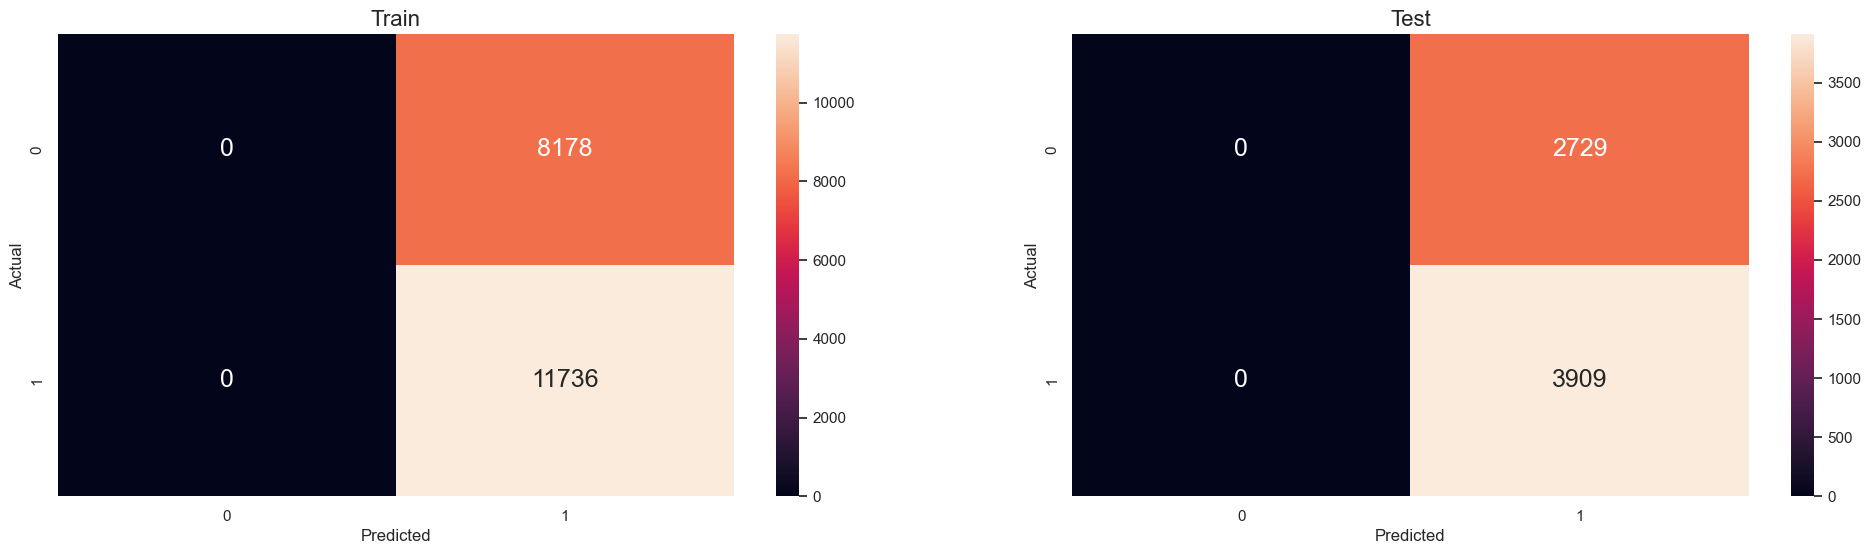

In [26]:
clf_sigmoid_train_pred = clf_sigmoid.predict(X_train)
clf_sigmoid_test_pred = clf_sigmoid.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf_sigmoid.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf_sigmoid.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, clf_sigmoid_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, clf_sigmoid_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

In [27]:
nc = NearestCentroid()
nc.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NearestCentroid()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6831374912122126 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6848448327809581 



Text(0.5, 33.249999999999986, 'Predicted')

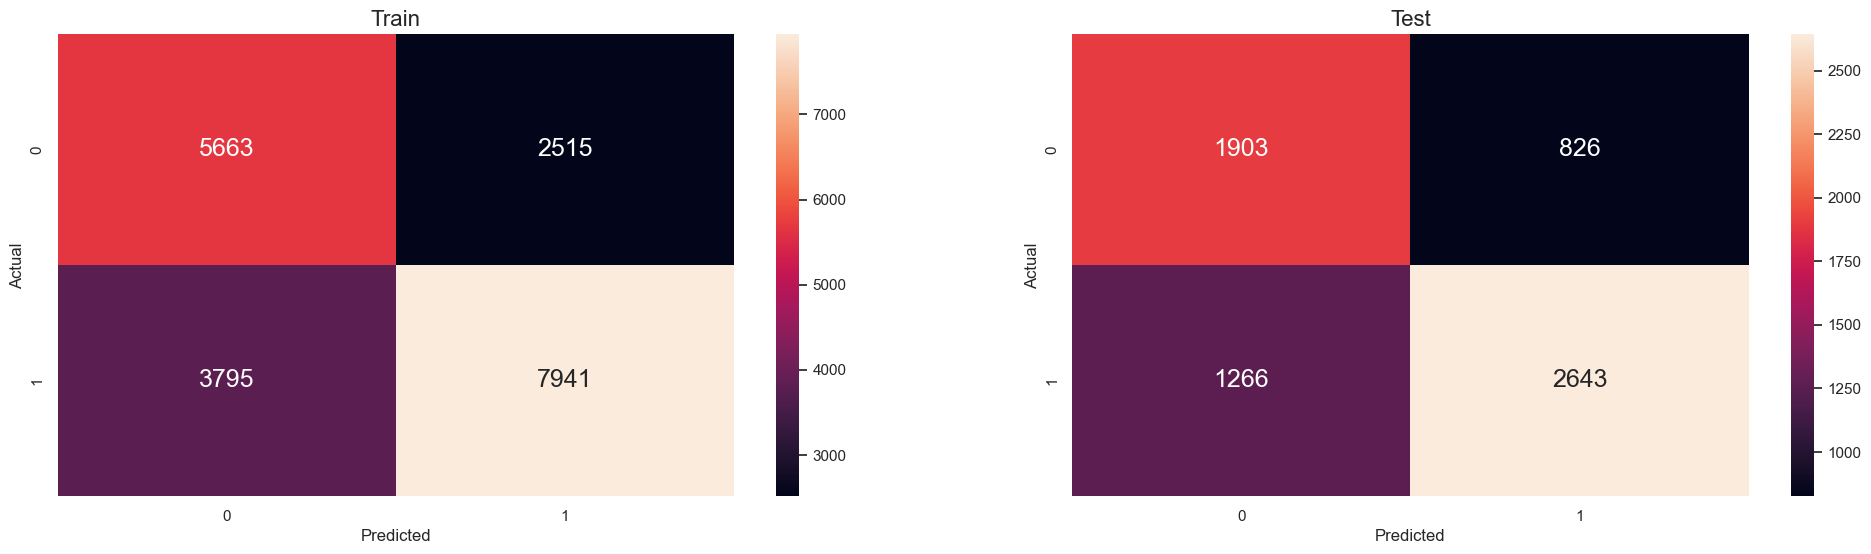

In [28]:

nc_train_pred = nc.predict(X_train)
nc_test_pred = nc.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", nc.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", nc.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, nc_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, nc_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6944360751230291 

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6940343476950889 



Text(1281.7954545454543, 0.5, 'Actual')

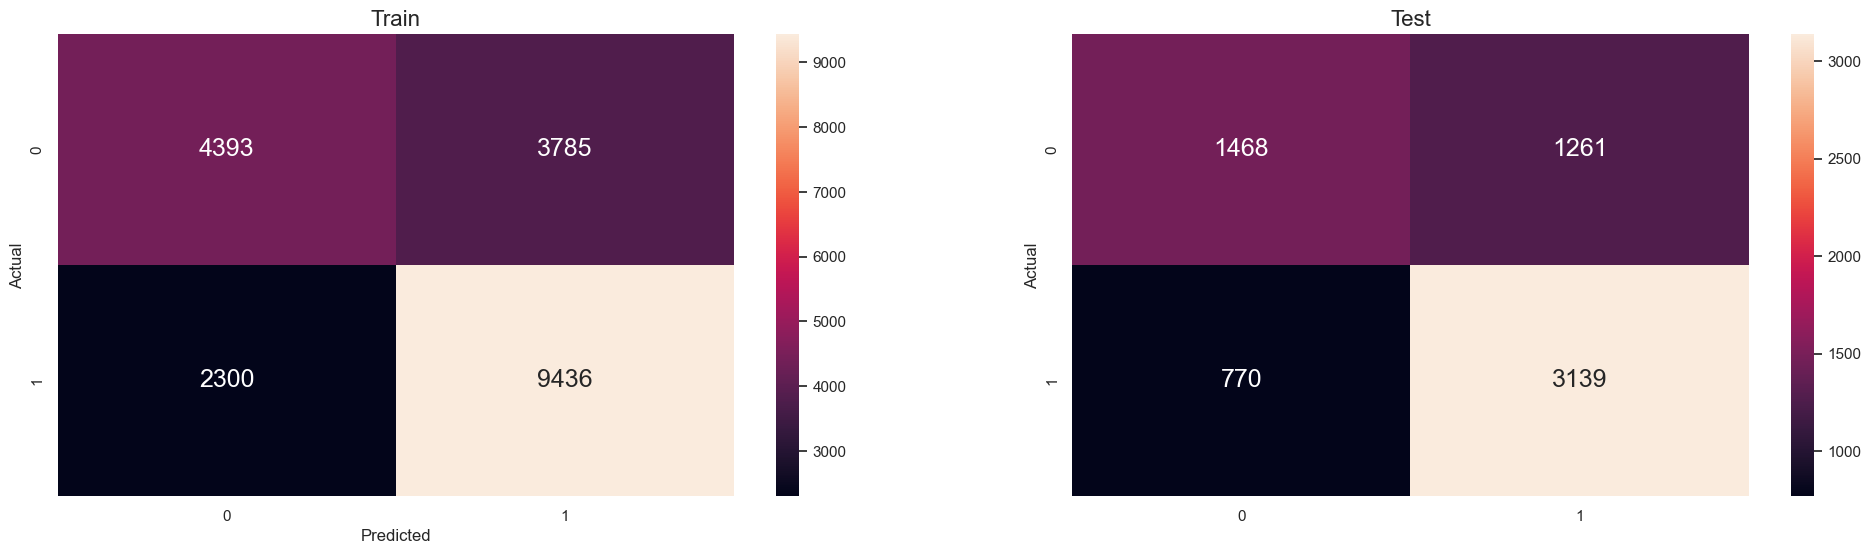

In [32]:
lr_train_pred = lr.predict(X_train)
lr_test_pred =lr.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train), "\n")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr.score(X_test, y_test), "\n")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, lr_train_pred),
           annot = True, fmt = ".0f", annot_kws = { "size": 18 }, ax = axes[0])
axes[0].set_title("Train", size = 16)
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

sns.heatmap(confusion_matrix(y_test, lr_test_pred), 
           annot = True, fmt=".0f", annot_kws = { "size": 18 }, ax = axes[1])
axes[1].set_title("Test")
axes[1].set_title("Test", size = 16)
axes[1].set_ylabel("Actual")